In [1]:
import numpy as np
import pandas as pd
import csv
with open(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv") as dms_GFP_datei:
    dms_GFP_datei_object = csv.reader(dms_GFP_datei, delimiter=',')
    print(dms_GFP_datei_object)
    for row in dms_GFP_datei_object:
        print(row)
GFP_dataset = pd.read_csv(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv")
print(GFP_dataset)
#Import the dataset

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                      mutant  \
0      K3R:V55A:Q94R:A110T:D117G:M153K:D216A   
1                       K3Q:V16A:I167T:L195Q   
2                K3Q:Y143C:N164D:S205P:A227T   
3                            K3Q:Y143N:V193A   
4                                        K3R   
...                                      ...   
51709                                  Y237N   
51710                                  Y237C   
51711                                  Y237D   
51712                                  Y237F   
51713                                  Y237H   

                                        mutated_sequence  DMS_score  \
0      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.301030   
1      MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.137350   
2      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.553913   
3      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.404237   
4      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.738586 

      New_AS  Fitness_Score
4          R       3.738586
48         Q       3.750487
703        E       3.666278
924        M       3.698336
1160       T       3.629775
...      ...            ...
51709      N       3.809468
51710      C       3.760217
51711      D       3.754101
51712      F       3.673173
51713      H       3.735417

[1084 rows x 2 columns]


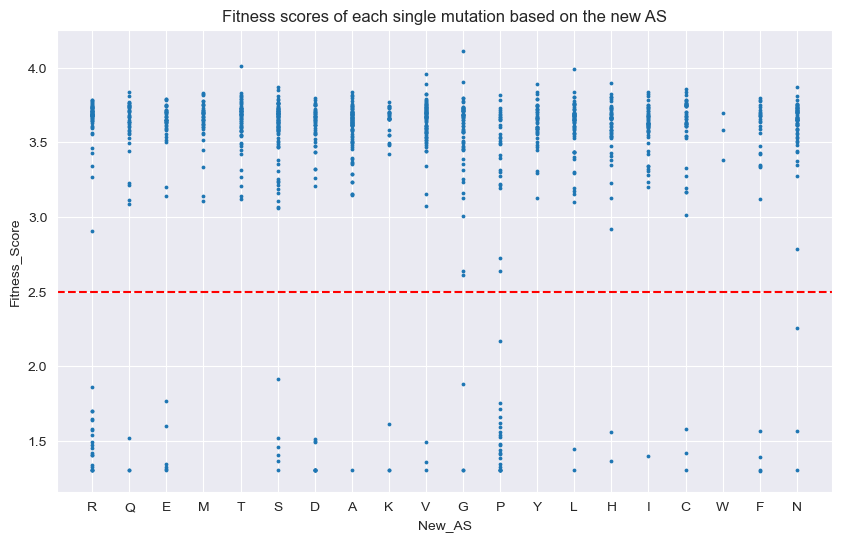

In [7]:
letzter_buchstabe = []
for index, row in GFP_dataset.iterrows():
    last_character = row["mutant"][-1]
    letzter_buchstabe.append(last_character)
letzter_buchstabe_df = pd.DataFrame(letzter_buchstabe, columns=["New_AS"])
#Letzter Buchstabe in jeder Zeile

number_mutations = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df = letzter_buchstabe_df[number_mutations_Single]
#Filtert alle True Zeilen aus beiden Dataframes und erstellt ein neues Dataframe. Er übernimmt automatisch die Filterung nach "True"-Werten
dms_score_df = []
for index, row in GFP_dataset.iterrows():
    dms_score = row["DMS_score"]
    dms_score_df.append(dms_score)
dms_score_df_alle = pd.DataFrame(dms_score_df, columns=["Fitness_Score"])
#erstellt Dataframe mit allen DMS-scores und der jeweiligen Experimentnummer

dms_score_filtered = dms_score_df_alle[number_mutations_Single]
#Dataframe mit allen DMS-scores der Einzelmutanten

dms_score_filtered_newAS = single_mutants_df.join(dms_score_filtered)
print(dms_score_filtered_newAS)
#Kombiniert und erstellt ein neues Dataframe mit der neuen AS und dem jeweiligen DMS-score
import matplotlib.pyplot as plt
dot_size = 3
dms_score_filtered_newAS.plot(x="New_AS", y="Fitness_Score", kind="scatter", s=dot_size)
plt.gcf().set_size_inches(10, 6)
plt.title("Fitness scores of each single mutation based on the new AS")
threshold = 2.5
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.show()
#Plot shows all the single mutants (new AA) with the corresponding dms-score. There is a clear cut off at 2.5 visible. Everything underneath is completely unfunctional

In [9]:
mutations_pos = []
for index, row in GFP_dataset.iterrows():
    mutations_pos_nummer = row["mutant"][1:-1]
    mutations_pos.append(mutations_pos_nummer)
mutations_pos_df = pd.DataFrame(mutations_pos, columns=["Position"])
#Entfernt erstmal nur das erste und letzte Zeichen
number_mutations = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df_pos = mutations_pos_df[number_mutations_Single]
#Erstellt ein Dataframe, dass die Positionen innerhalb des Proteins aller Einzelmutanten zeigt

mutations_pos_df_mit_scores = single_mutants_df_pos.join(dms_score_filtered)
#Kombiniert und erstellt Dataframe mit der Position der Mutation und dem jeweiligen DMS-score (zeigt NICHT die neuen AS)
new_column = mutations_pos_df_mit_scores["Position"]
Roman_1 = dms_score_filtered_newAS.join(new_column)
Roman_1 = Roman_1[["Position", "New_AS", "Fitness_Score"]]

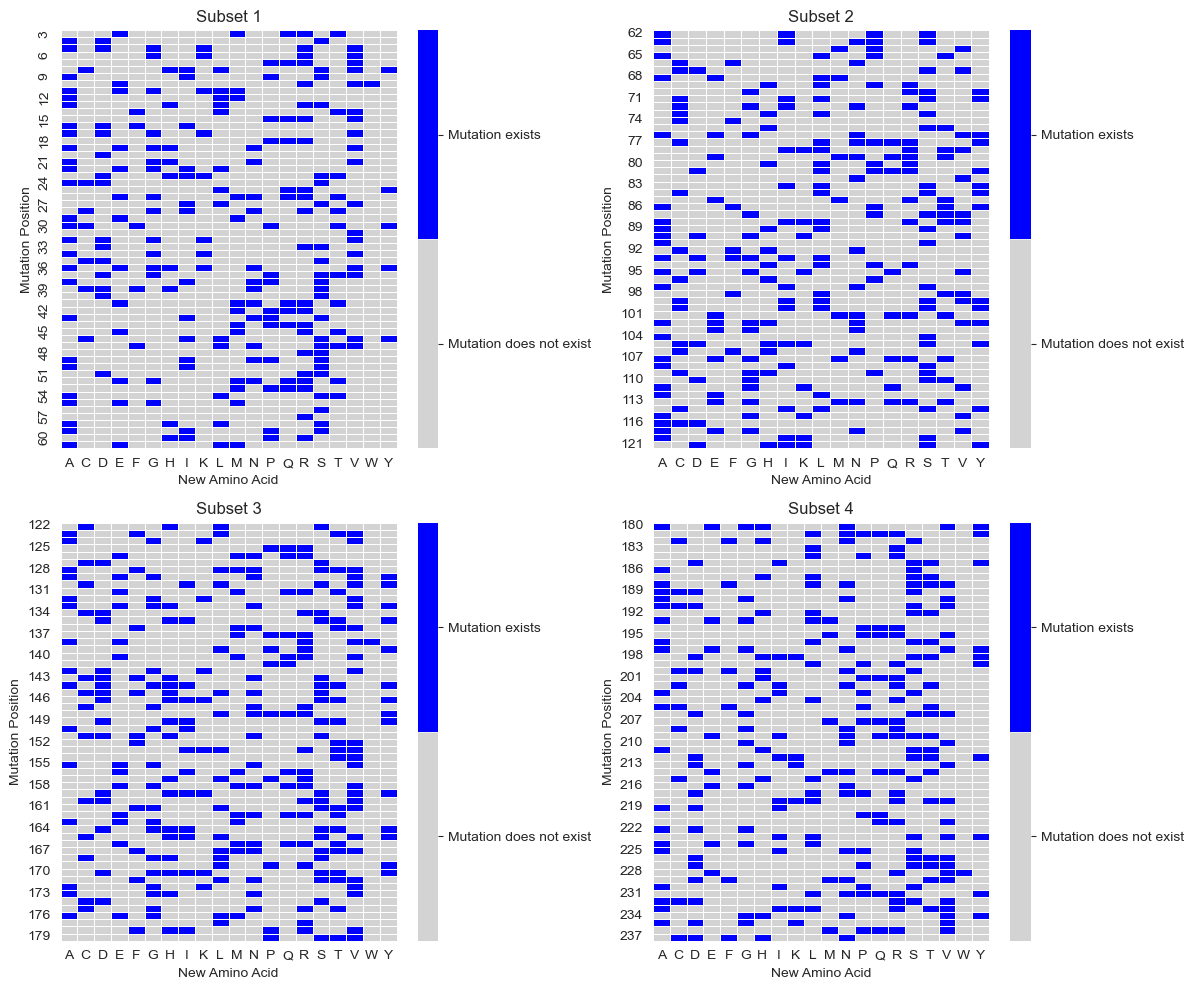

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

mutation_subsets = np.array_split(Roman_1['Position'].unique(), 4)  # Split into 4 subsets

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create a custom colormap with the first and last colors from 'cividis'
custom_colors = ["lightgray", "blue"]
cmap = sns.color_palette(custom_colors)

# Create a shared colorbar with two ticks for the two possibilities
cbar_ticks = [0.25, 0.75]
cbar_ticklabels = ['Mutation does not exist', 'Mutation exists']


# Define a custom sorting function for the y-axis values
def position_sort(position):
    if position.isdigit():
        return int(position)
    else:
        return position

# Iterate over subsets and create heatmaps
for i, subset in enumerate(mutation_subsets):
    row = i // 2
    col = i % 2

    # Filter data based on subset
    subset_df = Roman_1[Roman_1['Position'].isin(subset)]

    # Sort the data by "Mutation Position" column in ascending order
    subset_df = subset_df.sort_values('Position')

    # Create cross-tabulation
    cross_tab = pd.crosstab(subset_df['Position'], subset_df['New_AS'])

    # Sort the columns alphabetically for better visualization
    cross_tab_sorted = cross_tab.reindex(sorted(cross_tab.columns), axis=1)

    # Sort the rows based on the custom y-axis sorting function
    cross_tab_sorted = cross_tab_sorted.iloc[sorted(range(len(cross_tab_sorted)), key=lambda x: position_sort(cross_tab_sorted.index[x]))]

    # Create heatmap in the corresponding subplot
    ax = sns.heatmap(cross_tab_sorted, cmap=cmap, annot=False, fmt='d', ax=axes[row, col],
                     cbar_kws={'ticks': cbar_ticks, 'drawedges': True}, linewidths=0.5)

    axes[row, col].set_xlabel('New Amino Acid')
    axes[row, col].set_ylabel('Mutation Position')
    axes[row, col].set_title(f'Subset {i+1}')

    # Set colorbar tick labels
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels(cbar_ticklabels)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

#A heatmap to see which single mutations are available in the dataset and which are not.
#Only focuses on the new amino acid that occurs, not the old one before the mutation.